<a href="https://colab.research.google.com/github/Nanasz/Kelompok7-DataMining2/blob/main/Kelompok_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CASE STUDY 02 MixITup**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

##Load Data Excel

In [ ]:
import warnings; warnings.simplefilter('ignore')

try:
    import google.colab; IN_COLAB = True
    print("Installing the required modules")
    !pip install --upgrade umap-learn
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

Installing the required modules
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.6 MB/s 
     |████████████████████████████████| 1.1 MB 31.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=de2bdd16472e4c64a5b2ee4b28e3de6000cd33f97c1bfc9e7781fe2335f3b201
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=a082d1b09106b23c3ec7b7bcdc26c4269f089eecf835920ba1e7735338ba2e30
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent
--2022-10-12 02:07:01--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199

In [ ]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import umap, numpy as np, tau_unsup as tau, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

sns.set(style="ticks", color_codes=True)
random_state = 99

In [ ]:
# Running Locally, yakinkan "file_" berada di folder "data"
try :
    data = pd.read_excel("data/Data_Studi_Kasus_2.xlsx", sheet_name=0)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/Nanasz/Kelompok7-DataMining2/main/Data_Studi_Kasus_2.xlsx
    data = pd.read_excel("data/Data_Studi_Kasus_2.xlsx", sheet_name=0)
data.shape

--2022-10-12 02:07:47--  https://raw.githubusercontent.com/Nanasz/Kelompok7-DataMining2/main/Data_Studi_Kasus_2.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22293 (22K) [application/octet-stream]
Saving to: ‘data/Data_Studi_Kasus_2.xlsx’

Data_Studi_Kasus_2. 100%[===================>]  21.77K  --.-KB/s    in 0.001s  

2022-10-12 02:07:47 (24.2 MB/s) - ‘data/Data_Studi_Kasus_2.xlsx’ saved [22293/22293]



(200, 10)

In [ ]:
data

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,4098360,73,1,Depok,1.0,Senin,0
196,297,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,43032786,79,1,Depok,1.0,Senin,7
198,299,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0


## Mengatasi MV

In [ ]:
data.isna().sum()

ID                       0
Jenis Kelamin            4
Umur                     0
Pendapatan-per-bulan     0
skor-pengeluaran         0
Menikah                 12
Kota                     0
Promo                    6
HariFav                  0
FavFlavor                0
dtype: int64

kita tahu bahwa dalam dataset semua kolom tidak ada nilai yang kosong kecuali kolom Jenis Kelamin dengan 4 missing value, kolom Menikah dengan 12 missing value dan kolom Promo dengan 6 missing value

In [ ]:
# Mengatasi MV
data.fillna(0, inplace = True)

In [ ]:
data

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,4098360,73,1,Depok,1.0,Senin,0
196,297,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,43032786,79,1,Depok,1.0,Senin,7
198,299,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0


Mengganti semua nilai yang kosong dengan angka nol di pandas dataframe.

## Melihat tipe data dalam tabel Mixltup

In [ ]:
# Tipe Datanya : DataFrame (df)
print(type(data))
# Ukuran Data
N, P = data.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 200, ', Kolom = ', 10)

Tipe data yang dimiliki adalah pandas dataframe.

In [ ]:
data.dtypes

ID                        int64
Jenis Kelamin            object
Umur                     object
Pendapatan-per-bulan      int64
skor-pengeluaran          int64
Menikah                  object
Kota                     object
Promo                   float64
HariFav                  object
FavFlavor                 int64
dtype: object

## Mengubah tipe data

In [ ]:
data['Jenis Kelamin'] = data['Jenis Kelamin'].astype('category')
data['Pendapatan-per-bulan'] = data['Pendapatan-per-bulan'].astype('float64')
data['Kota'] = data['Kota'].astype('category')

Mengubah tipe data kolom jenis kelamin menjadi tipe data category.
Mengubah tipe data pendapatan per bulan menjadi tipe data float64.

In [ ]:
data

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754.0,52,1,Jakarta,1.0,Sabtu,2
1,Wanita,32,33606557.0,86,1,Depok,1.0,Minggu,6
2,Pria,51,15983606.0,41,1,Jakarta,2.0,Minggu,3
3,Pria,19,12704918.0,55,0,Jakarta,1.0,Rabu,7
4,Wanita,38,20081967.0,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360.0,73,1,Depok,1.0,Senin,0
196,Pria,57,15983606.0,51,1,Jakarta,1.0,Minggu,5
197,Wanita,35,43032786.0,79,1,Depok,1.0,Senin,7
198,Wanita,23,1229508.0,94,1,Depok,0.0,Selasa,0


## Menghapus data tidak penting

In [ ]:
# menghapus data yang tidak berguna
data.drop("ID", axis=1, inplace=True)

KeyError: ignored

Menghapus data yang tidak berguna yaitu kolom ID.

In [ ]:
data

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754.0,52,1,Jakarta,1.0,Sabtu,2
1,Wanita,32,33606557.0,86,1,Depok,1.0,Minggu,6
2,Pria,51,15983606.0,41,1,Jakarta,2.0,Minggu,3
3,Pria,19,12704918.0,55,0,Jakarta,1.0,Rabu,7
4,Wanita,38,20081967.0,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360.0,73,1,Depok,1.0,Senin,0
196,Pria,57,15983606.0,51,1,Jakarta,1.0,Minggu,5
197,Wanita,35,43032786.0,79,1,Depok,1.0,Senin,7
198,Wanita,23,1229508.0,94,1,Depok,0.0,Selasa,0


### Mengecek duplikat data

In [ ]:
# memeriksa duplikasi data
print(data.shape)
data.duplicated().sum()

(200, 9)


0

## Mengecek Outlier

ValueError: ignored

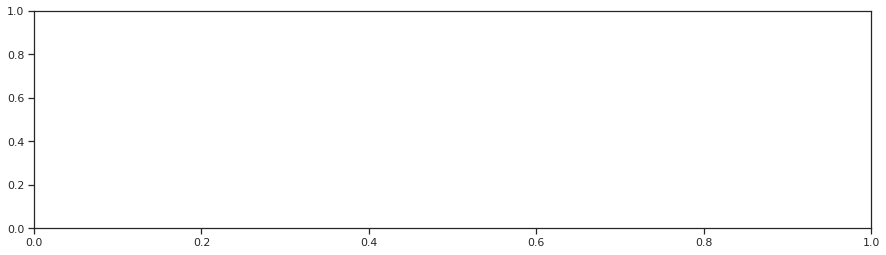

In [ ]:
#Mengecek outlier menggunakan visualisasi boxplot
fig, ax = plt.subplots(figsize = (15,4))
sns.boxplot(x = data).set_title('Wind Speed Boxplot')

## Rumusan Masalah

In [ ]:
data

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754.0,52,1,Jakarta,1.0,Sabtu,2
1,Wanita,32,33606557.0,86,1,Depok,1.0,Minggu,6
2,Pria,51,15983606.0,41,1,Jakarta,2.0,Minggu,3
3,Pria,19,12704918.0,55,0,Jakarta,1.0,Rabu,7
4,Wanita,38,20081967.0,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360.0,73,1,Depok,1.0,Senin,0
196,Pria,57,15983606.0,51,1,Jakarta,1.0,Minggu,5
197,Wanita,35,43032786.0,79,1,Depok,1.0,Senin,7
198,Wanita,23,1229508.0,94,1,Depok,0.0,Selasa,0


In [ ]:
## mengecek korelasi setiap variabel
data.corr()

,Pendapatan-per-bulan,skor-pengeluaran,Promo,FavFlavor
Pendapatan-per-bulan,1.000000,0.009587,0.061492,0.01515
skor-pengeluaran,0.009587,1.000000,-0.876629,-0.18561
Promo,0.061492,-0.876629,1.000000,0.16909
FavFlavor,0.015150,-0.185610,0.169090,1.00000


### Apakah Status mempengaruhi rasa Ice Cream yang paling sering di pilih customer

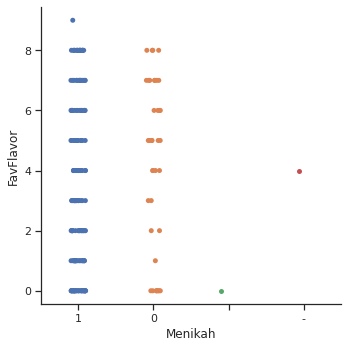

In [ ]:
p= sns.catplot(x="Menikah", y="FavFlavor", data = data)
# Apa yang bisa dilihat dari hasil ini?

Terindikasi bahwa mayoritas orang yang sudah menikah lebih sering membeli ice cream daripada orang yang belum menikah.

Apakah Kota Mempengaruhi Pendapatan per bulan

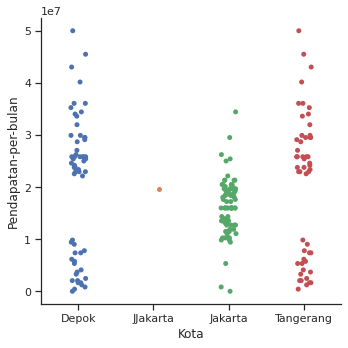

In [ ]:
p= sns.catplot(x="Kota", y="Pendapatan-per-bulan", data = data)
# Apa yang bisa dilihat dari hasil ini?

In [ ]:
data.info()

In [ ]:
data.dtypes

## Clustering

In [ ]:
# K-Means
# load the data
X = data[['FavFlavor']]#.values
C = data['skor-pengeluaran']#.values
print(X.shape)
data.sample(10)

(200, 1)


,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,k-means++
49,Wanita,34,17622950.0,60,1,Jakarta,1.0,Senin,1,0
136,Pria,43,22950819.0,35,1,Tangerang,2.0,Selasa,7,1
166,Wanita,30,25819672.0,78,1,Depok,1.0,Sabtu,5,2
146,Pria,19,13524590.0,59,0,Jakarta,1.0,Senin,5,2
198,Wanita,23,1229508.0,94,1,Depok,0.0,Selasa,0,0
191,Wanita,22,819672.0,76,1,Depok,1.0,Senin,0,0
178,Wanita,22,17213114.0,55,0,Jakarta,1.0,Senin,8,1
156,Wanita,36,9016393.0,26,1,Tangerang,3.0,Sabtu,3,2
34,Wanita,23,19262295.0,41,1,Jakarta,2.0,Senin,1,0
85,Wanita,46,15983606.0,44,1,Jakarta,2.0,Rabu,6,1


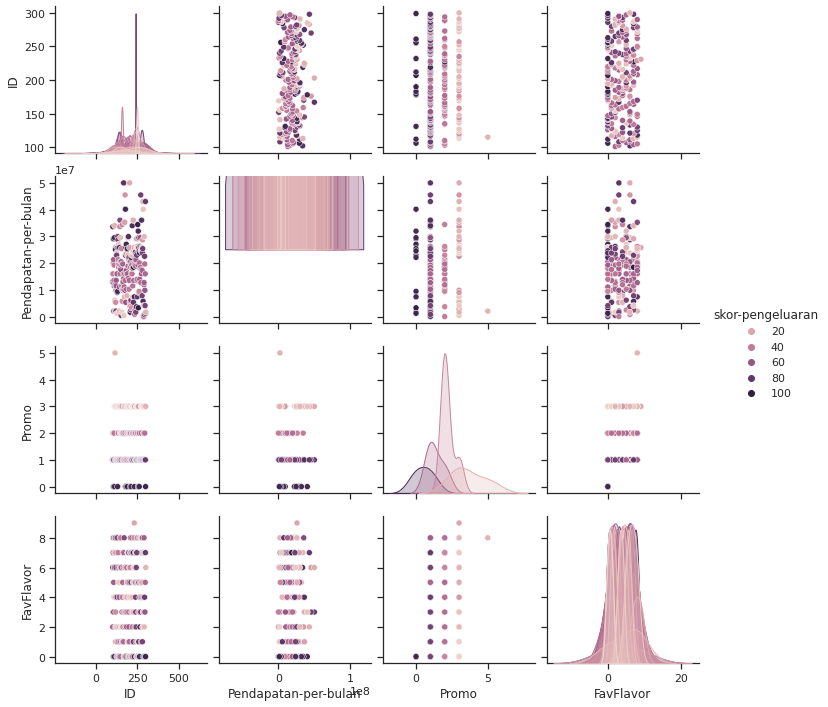

In [ ]:
g = sns.pairplot(data, hue="skor-pengeluaran")

array([0, 1, 2, 1, 1, 0, 2, 2, 1, 2], dtype=int32)

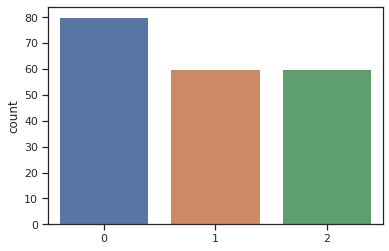

In [ ]:
# k-means++ clustering http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
k=3
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPP.fit(X)
C_kmpp = kmPP.predict(X)

# hasil clusteringnya
sns.countplot(x=C_kmpp)
C_kmpp[:10]

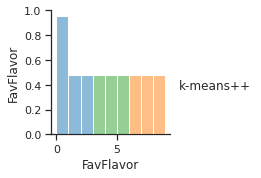

In [ ]:
# visualisasi setelah clustering
data['k-means++'] = C_kmpp
g = sns.pairplot(data[['FavFlavor','k-means++']], \
                 hue="k-means++", diag_kind="hist", palette="tab10")